# Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os


# Merge 12 months of sales data into a single file

In [2]:

df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files=[file for file in os.listdir('./Sales_Data')]

all_months=pd.DataFrame()

for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months=pd.concat([all_months,df])
    
    
all_months.to_csv('all_data.csv',index=False)  

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean the data (Remove the nan values as well as some dirty values)

### Drop the NaN rows

In [4]:
all_data=all_data.dropna(how='any')  # how='any' will drop any row with atleast one value as NaN/ all will drop all rows with all the attributes NaN.
all_data.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
#Further, there was an error like, there were some entries where in the Order Date attribute was 'Order Date'
temp_df=all_data[all_data['Order Date'].str[0:2]!='Or']
temp_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data=temp_df

### Augment data with additional columns

In [7]:
all_data['Month']=all_data['Order Date'].str[0:2] #convert to string first, then take the first two characters.
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Question 1 : What was the best month for sale? And what was the revenue that month?

In [8]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('float32') # for conversion. commonly used in cloumns.
all_data['Price Each']=all_data['Price Each'].astype('float32')

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [13]:
print(all_data.groupby('Month').sum()['Sales'])
results=all_data.groupby('Month').sum()

#Month with the highest sales is December,lowest is January.

Month
1     1822256.75
2     2202022.50
3     2807100.25
4     3390670.25
5     3152606.75
6     2577802.25
7     2647775.75
8     2244467.75
9     2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32


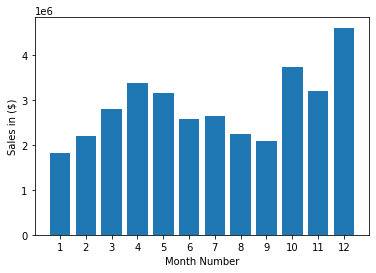

In [16]:
import matplotlib.pyplot as plt
months=range(1,13)

plt.bar(months,results['Sales'])

plt.xticks(months)

plt.xlabel("Month Number")
plt.ylabel("Sales in ($)")
plt.show()



# Question 2 : What city had the highest number of sales?

### Add a city column first

In [23]:
# the apply() will allow us to run any function on our dataframe.

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
#To delete a column, do all_data=all_data.delete(columns='column_name')
#However, there can be many city duplicates around the world as well, so just sorting on the basis of city is not enough.
#for example, there can be two portlands, one in UK and other one in US.

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,176560,Google Phone,1.0,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,176560,Wired Headphones,1.0,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,176561,Wired Headphones,1.0,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


In [27]:
res = all_data.groupby('City').sum()
res

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602.0,2779908.250,104794,2.795498e+06
Austin TX,11153.0,1809873.625,69829,1.819582e+06
Boston MA,22528.0,3637409.750,141112,3.661642e+06
Dallas TX,16730.0,2752627.750,104620,2.767976e+06
Los Angeles CA,33289.0,5421435.000,208325,5.452571e+06
New York City NY,27932.0,4635371.000,175741,4.664318e+06
Portland ME,2750.0,447189.250,17144,4.497583e+05
Portland OR,11303.0,1860558.250,70621,1.870732e+06
San Francisco CA,50239.0,8211461.500,315520,8.262204e+06


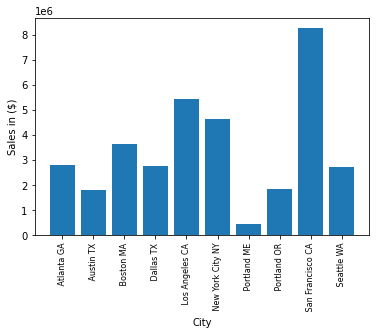

In [30]:

cities=[city for city, df in all_data.groupby('City')]

#cities=all_data['City'].unique() : this command might have been useful,but it does not give us the info in the order.
#so,we will have to resort to use another function that was available on stackoverflow.

plt.bar(cities,res['Sales'])

plt.xticks(cities,rotation='vertical',size=8)

plt.xlabel("City")
plt.ylabel("Sales in ($)")
plt.show()

# Question 3 : What time should we display the advertisments to maximize likelihood of customer's buying product?

In [35]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])  #to_datetime is a standara format that can be used easily.
all_data['Hour']=all_data['Order Date'].dt.hour 
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA,22,30
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,9,27


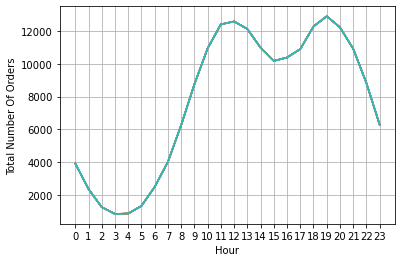

In [41]:
hours=[hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Total Number Of Orders')
plt.show()

#all_data.groupby('Hour').count()

# Ques